In [4]:
from utils import utils, dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [5]:
dataset.change_dataset("ToN_IoT_80-20")
x_train, y_train = dataset.get_dataset(df=dataset.load_dataset_full(1))
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Dataset:  ToN_IoT_80-20
loading dataset:  1


In [7]:
x_test, y_test = dataset.get_dataset(df=dataset.load_dataset_test())

In [8]:
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

In [9]:
epochs = 10
batch_size = 256
class_weights = utils.calc_class_weights(y_train)

In [10]:
y_test = utils.label_to_categorical(y_test)
y_train = utils.label_to_categorical(y_train)
y_val = utils.label_to_categorical(y_val)

In [11]:
model = utils.get_model(inshape=x_train.shape[1])

Get model for ./dataset/ToN_IoT_80-20/


In [12]:
from tensorflow.keras.utils import plot_model

# model = Model(...)

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
history = model.fit(
    x_train,
    y_train,
    shuffle=True,
    epochs=epochs,
    batch_size=batch_size,
    # validation_split = 0.2,
    validation_data=(x_val, y_val),
    class_weight=class_weights,
    workers=3
)

Epoch 1/10
93/93 [==============================] - 1s 9ms/step - loss: 1.6023 - acc: 0.5686 - f1_score: 0.4583 - precision: 0.8980 - recall: 0.2569 - val_loss: 1.0227 - val_acc: 0.7117 - val_f1_score: 0.6104 - val_precision: 0.8894 - val_recall: 0.4162
Epoch 2/10
93/93 [==============================] - 1s 7ms/step - loss: 1.0929 - acc: 0.7102 - f1_score: 0.6093 - precision: 0.9028 - recall: 0.4779 - val_loss: 0.7993 - val_acc: 0.7230 - val_f1_score: 0.5972 - val_precision: 0.8759 - val_recall: 0.5408
Epoch 3/10
93/93 [==============================] - 1s 8ms/step - loss: 0.9545 - acc: 0.7249 - f1_score: 0.6280 - precision: 0.8726 - recall: 0.5706 - val_loss: 0.7171 - val_acc: 0.7533 - val_f1_score: 0.6536 - val_precision: 0.9484 - val_recall: 0.5316
Epoch 4/10
93/93 [==============================] - 1s 7ms/step - loss: 0.8896 - acc: 0.7357 - f1_score: 0.6413 - precision: 0.8735 - recall: 0.6041 - val_loss: 0.7288 - val_acc: 0.7626 - val_f1_score: 0.6492 - val_precision: 0.8724 - val

In [15]:
result, details = utils.get_model_result(model, x_test, y_test, batch_size)

print("Result:", result)
print("Details:", details)

124/124 [==============================] - 0s 2ms/step
normal : f1 = 1.0, precision = 1.0, recall = 1.0 
backdoor : f1 = 0.9054450100262225, precision = 0.8354682607458013, recall = 0.9882154882154882 
ddos : f1 = 0.6314804416994197, precision = 0.7224839400428266, recall = 0.5608377659574468 
dos : f1 = 0.9575928206932958, precision = 0.9992655159750276, recall = 0.9192567567567568 
injection : f1 = 0.6432347478211173, precision = 0.5727735368956743, recall = 0.7334636689475399 
password : f1 = 0.2803304078471864, precision = 0.6292004634994206, recall = 0.18033875788774492 
ransomware : f1 = 0.847613782937166, precision = 0.9259259259259259, recall = 0.781515460414543 
scanning : f1 = 0.8434301057224366, precision = 0.8677486187845304, recall = 0.8204374795951681 
xss : f1 = 0.7510748702742772, precision = 0.6862638851259821, recall = 0.8294040602488539 
mitm : f1 = 0.1458227848101266, precision = 0.07960199004975124, recall = 0.8674698795180723 

Accuracy: 0.7909782986385318
Result:

In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [30]:
y_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [31]:
predictions = model.predict(x_test)

990/990 [==============================] - 1s 778us/step


In [33]:
predictions

array([[9.9872619e-01, 3.9599640e-16, 2.3509949e-06, ..., 3.9543121e-08,
        8.8135284e-06, 1.1217387e-03],
       [1.3017501e-05, 6.1156857e-17, 3.4218025e-04, ..., 4.9096919e-08,
        3.1607786e-05, 2.3286004e-04],
       [1.3550522e-06, 7.8797317e-01, 8.3408728e-02, ..., 3.4175217e-02,
        2.6914988e-02, 4.8063211e-03],
       ...,
       [2.9169054e-05, 2.3180111e-09, 7.0366440e-03, ..., 1.8338808e-04,
        2.5802124e-02, 2.2682561e-01],
       [8.1067576e-08, 9.7118104e-01, 8.5266342e-04, ..., 2.6959838e-02,
        4.6098525e-05, 1.8088381e-04],
       [4.0469968e-05, 7.8688102e-04, 5.9318483e-02, ..., 2.3728008e-03,
        7.4034256e-01, 5.6346923e-02]], dtype=float32)

In [36]:
model_preds = predictions.argmax(axis=1)

In [37]:
model_preds

array([0, 3, 1, ..., 4, 1, 8], dtype=int64)

In [40]:
y_test.astype('int64')

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [42]:
confusion  = tf.math.confusion_matrix(
    labels=y_test.argmax(axis=1),
    predictions=model_preds,
    num_classes=10    
)

In [50]:
confusion

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[7413,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 2935,    1,    0,    0,   13,    2,    2,    0,   17],
       [   0,   20, 1687,    2,   82,    8,   38,   10,  350,  811],
       [   0,    0,    1, 2721,    3,    1,    0,    1,    1,  232],
       [   0,    2,   68,    0, 2251,  281,  105,    3,  264,   95],
       [   0,  243,  437,    0, 1539,  543,    0,   30,   18,  201],
       [   0,    4,    0,    0,    0,    0, 2300,  156,  459,   24],
       [   0,  308,   86,    0,    2,    0,    1, 2513,   61,   92],
       [   0,    1,   53,    0,   43,   16,   34,  181, 2533,  193],
       [   0,    0,    2,    0,   10,    1,    4,    0,    5,  144]])>

In [54]:
def plot_confussion_matrix(model, x_test, y_test, batch_size, path):
    pred = model.predict(x_test, batch_size=batch_size)
    
    confusion  = tf.math.confusion_matrix(
        labels=y_test.argmax(axis=1),
        predictions=pred.argmax(axis=1),
        num_classes=10    
    )
    print(confusion)
    conf_matrix = np.array(confusion)
    # print(conf_matrix)

    plt.figure().clear()
    plt.close()
    plt.clf()

    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha = 1)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j]/10, va='center', ha='center', size='x-large')

    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.savefig(path)
    

124/124 [==============================] - 0s 2ms/step
tf.Tensor(
[[7413    0    0    0    0    0    0    0    0    0]
 [   0 2935    1    0    0   13    2    2    0   17]
 [   0   20 1687    2   82    8   38   10  350  811]
 [   0    0    1 2721    3    1    0    1    1  232]
 [   0    2   68    0 2251  281  105    3  264   95]
 [   0  243  437    0 1539  543    0   30   18  201]
 [   0    4    0    0    0    0 2300  156  459   24]
 [   0  308   86    0    2    0    1 2513   61   92]
 [   0    1   53    0   43   16   34  181 2533  193]
 [   0    0    2    0   10    1    4    0    5  144]], shape=(10, 10), dtype=int32)


<Figure size 640x480 with 0 Axes>

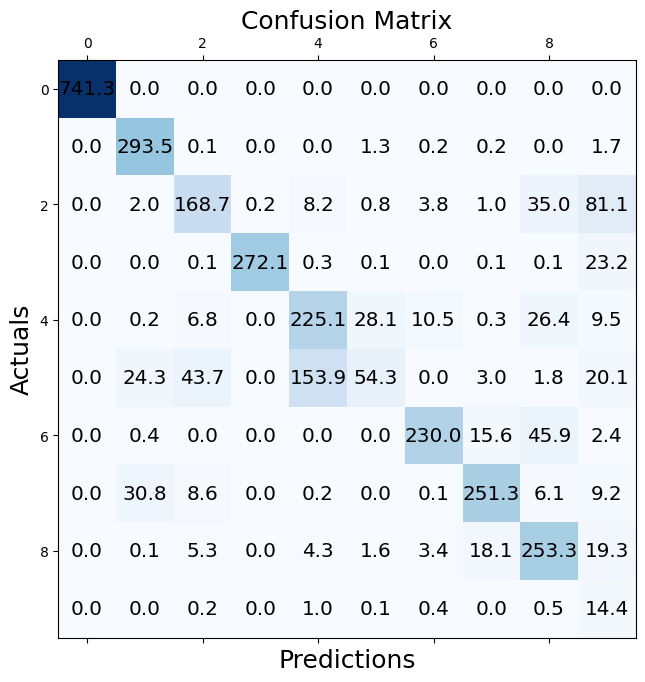

In [55]:
plot_confussion_matrix(model, x_test, y_test, batch_size, 'test.png')

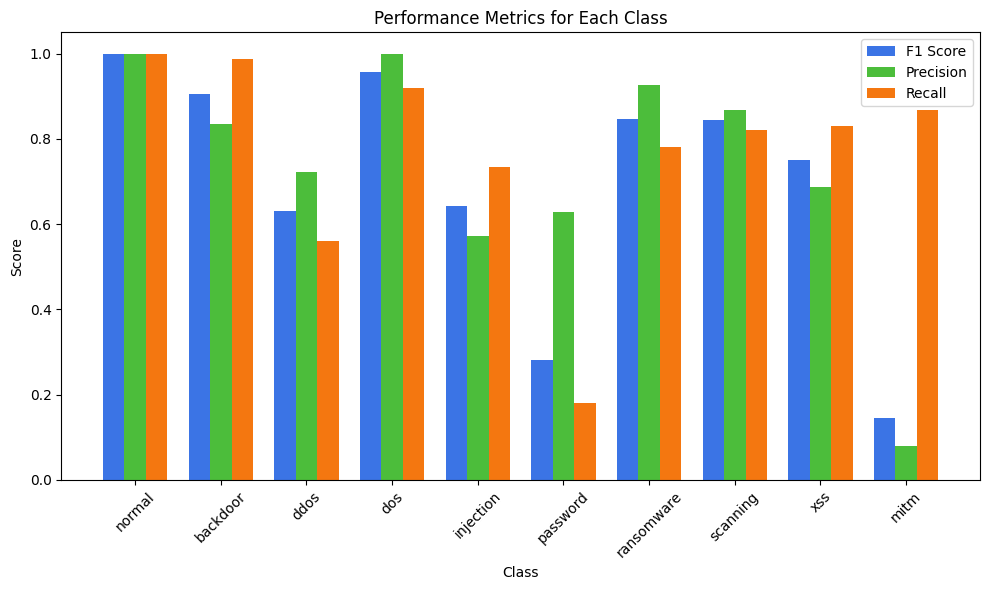

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['normal', 'backdoor', 'ddos', 'dos', 'injection', 'password', 'ransomware', 'scanning', 'xss', 'mitm']
f1_scores = [1.0, 0.9054450100262225, 0.6314804416994197, 0.9575928206932958, 0.6432347478211173, 0.2803304078471864, 0.847613782937166, 0.8434301057224366, 0.7510748702742772, 0.1458227848101266]
precisions = [1.0, 0.8354682607458013, 0.7224839400428266, 0.9992655159750276, 0.5727735368956743, 0.6292004634994206, 0.9259259259259259, 0.8677486187845304, 0.6862638851259821, 0.07960199004975124]
recalls = [1.0, 0.9882154882154882, 0.5608377659574468, 0.9192567567567568, 0.7334636689475399, 0.18033875788774492, 0.781515460414543, 0.8204374795951681, 0.8294040602488539, 0.8674698795180723]

# Transpose data
data = np.array([f1_scores, precisions, recalls])

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(categories))

plt.bar(index, data[0], bar_width, label='F1 Score', color='#3B74E5')
plt.bar(index + bar_width, data[1], bar_width, label='Precision', color='#4CBD3B')
plt.bar(index + 2*bar_width, data[2], bar_width, label='Recall', color='#F47710')

plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(index + bar_width, categories, rotation=45)
plt.title('Performance Metrics for Each Class')
plt.legend()

plt.tight_layout()
plt.show()


In [76]:

from sklearn.utils import compute_class_weight
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix

In [98]:
def plot_model_result(model, x, y, batch_size, path):
    pred = model.predict(x, batch_size=batch_size)
    # Data
    categories = dataset.get_output_feature_labels()
    f1_scores = f1_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)
    precisions = precision_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)
    recalls = recall_score(y.argmax(axis=-1), pred.argmax(axis=-1), average=None)

    # Transpose data
    data = np.array([f1_scores, precisions, recalls])


    plt.figure().clear()
    plt.close()
    plt.clf()


    # Plotting
    plt.figure(figsize=(10, 6))

    bar_width = 0.25
    index = np.arange(len(categories))
    
    plt.grid(axis='y', color = '#5A616E', linestyle = '--', linewidth = 0.5)

    plt.bar(index, data[0], bar_width, label='F1 Score', color='#3B74E5')
    plt.bar(index + bar_width, data[1], bar_width, label='Precision', color='#4CBD3B')
    plt.bar(index + 2*bar_width, data[2], bar_width, label='Recall', color='#F47710')

    plt.ylabel('Score')
    plt.xlabel('Class')
    plt.xticks(index + bar_width, categories, rotation=45)
    plt.title('Performance Metrics for Each Class')
    plt.legend()

    plt.tight_layout()
    plt.savefig(path)

124/124 [==============================] - 0s 2ms/step


<Figure size 640x480 with 0 Axes>

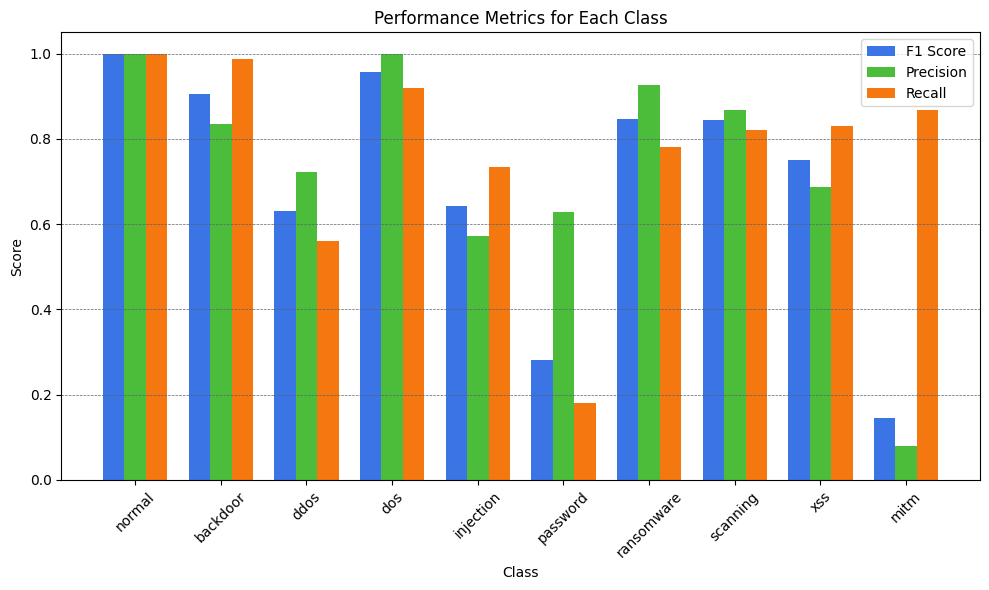

In [99]:
plot_model_result(model, x_test, y_test, batch_size, 'test2.png')